###Plots histograms from the output of climatology_qvp.ipynb, i.e. the out* files only

In [1]:
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
import glob
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
import pandas as pd
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar
import datetime as dt
from datetime import timedelta
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator,DateFormatter, drange
from scipy.stats.stats import pearsonr
from scipy.signal import correlate

In [2]:
#%pylab

In [3]:
def get_miub_cmap():
    startcolor = 'white'  # a dark olive
    color1 = '#8ec7ff'#'cyan'    # a bright yellow
    color2 = 'dodgerblue'
    color3 = 'darkgreen'
    #color3 = 'lime'
    color4 = 'yellow'
    color5 = 'darkorange'
    color6 = 'red'
    #color7 = 'purple'
    endcolor = 'darkmagenta'    # medium dark red
    colors = [startcolor, color1, color2, color3, color4, color5, color6, endcolor]
    return mpl.colors.LinearSegmentedColormap.from_list('miub1',colors)


In [4]:
def add_cbar(im, ticks, norm):
    cbar = pl.colorbar(im[-1], norm=norm, boundaries=ticks, pad=0.05)
    cbar.locator = mpl.ticker.FixedLocator(ticks)
    cbar.update_ticks()
    return cbar

In [5]:
def get_norm(ticks):
    cmap = get_miub_cmap()
    norm = mpl.colors.BoundaryNorm(ticks, cmap.N)
    return norm

In [6]:
def shift(xs, n):
    if n >= 0:
        return np.r_[np.full(n, np.nan), xs[:-n]]
    else:
        return np.r_[xs[-n:], np.full(-n, np.nan)]

#Load output files

In [7]:
datepath="/home/silke/Python/projects/climatology/"
outputf = sorted(glob.glob(datepath + "out*.txt"))
dates=range(len(outputf))
print('outputf',outputf[3])
for l in range(len(outputf)):
    dates[l]=outputf[l][44:54]

###Versteh Fehler nicht, lasse erstmal 2013-05-29 weg
##Ich glaub 2015-04-02 gibts keine Wippeninfo, ebenfalls weg:'2015-05-03', '2015-05-29', '2015-06-02','2015-06-13', '2015-06-23', '2015-07-13','2015-07-26', 
#     '2015-08-08','2015-08-16', '2015-08-17', '2015-09-01','2015-09-16'
## Ich glaub 2015-04-04 ist die ML zu niedrig, ebenfalls weg
##'2016-01-10','2016-01-11', '2016-01-13'
##Fast das komplette 2015 hat keine Wippeninfo!!
##high rainrates raus '2013-07-03', '2014-05-06', '2014-08-26',
##nearly high rain rates '2015-06-13','2015-08-08','2015-09-01',
datesredu=['2013-04-12','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03',
       '2015-06-02', '2015-06-23', '2015-08-04','2015-08-17','2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-17', '2015-11-19', '2015-11-29', '2015-12-04', 
       '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-07','2016-01-30','2016-09-04']
dates=['2013-04-12','2013-07-03','2014-05-06','2014-05-27','2014-06-28','2014-07-05','2014-07-08',
       '2014-07-09','2014-08-26','2014-10-07','2014-10-08','2014-10-09','2014-10-15','2014-11-04','2014-12-12',     
       '2014-11-16','2014-12-19','2015-01-02','2015-01-08','2015-02-27','2015-03-29','2015-04-02','2015-05-03','2015-05-29',
       '2015-06-02', '2015-06-13','2015-06-22','2015-06-23', '2015-07-13','2015-08-04','2015-08-08','2015-08-17',
       '2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-02','2016-01-07','2016-09-04']

dates_low=['2013-04-12', '2015-04-02', '2015-04-04','2015-05-03', '2015-05-29',
       '2015-06-02', '2015-06-23', '2015-07-13',
       '2015-08-17', '2015-09-16',
       '2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09','2015-12-11', 
       '2015-12-16','2015-12-22', '2015-12-25','2016-01-02', '2016-01-07']
print(dates)


('outputf', '/home/silke/Python/projects/climatology/out_2014-05-27.txt')
['2013-04-12', '2013-07-03', '2014-05-06', '2014-05-27', '2014-06-28', '2014-07-05', '2014-07-08', '2014-07-09', '2014-08-26', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-15', '2014-11-04', '2014-12-12', '2014-11-16', '2014-12-19', '2015-01-02', '2015-01-08', '2015-02-27', '2015-03-29', '2015-04-02', '2015-05-03', '2015-05-29', '2015-06-02', '2015-06-13', '2015-06-22', '2015-06-23', '2015-07-13', '2015-08-04', '2015-08-08', '2015-08-17', '2015-08-27', '2015-09-01', '2015-09-13', '2015-09-16', '2015-09-22', '2015-10-05', '2015-11-06', '2015-11-17', '2015-11-19', '2015-11-20', '2015-11-29', '2015-12-08', '2015-12-09', '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25', '2016-01-02', '2016-01-07', '2016-09-04']


# Read the output files

In [8]:
def runningMean(x, N):
    y = np.zeros((len(x)-N+1,))
    for ctr in range(len(x)-N+1):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

a=[3,5,np.nan, np.nan,7,3,7,9,45,232,5,7,9,0]
print(runningMean(a,2))

[  4.    nan   nan   nan   5.    5.    8.   27.  138.5 118.5   6.    8.
   4.5]


In [9]:
def savitzky_golay(y, window_size, order, deriv=0):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techhniques.
    
    This code has been taken from http://www.scipy.org/Cookbook/SavitzkyGolay
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.savefig('images/golay.png')
    #plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv]
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m, y, mode='valid')

#First try with pearson

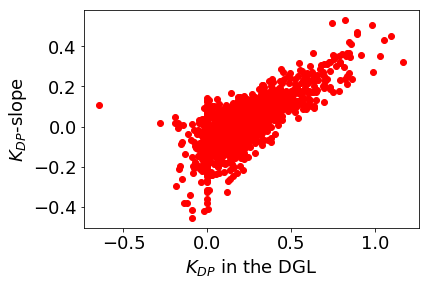

('nanlist', [104, 108, 487, 488, 489, 490, 491, 504, 1528, 1529, 1570, 1603, 1604, 1607, 1895, 1904, 1905, 1906, 1907, 2005, 2006, 2007, 2292, 2321, 2322])
('Zh_ML_ave und _max und _min', 31.214273, 37.83300132751465, 23.75)
('Zdr_ML_ave und _max und _min', 1.4294257, 1.8799999952316284, 1.0299999713897705)
('Kdp_ML_ave und _max und _min', 0.1867442, 0.33000001311302185, 0.05999999865889549)
('R_ML_ave und _max und _min', 0.929048, 0.9509999752044678, 0.9020000100135803)
('D_ML_ave und _max und _min', 1.842248, 2.299999952316284, 1.399999976158142)
('St_ave und _max und _min', 1.3486403, 2.8200000286102296, 0.0)


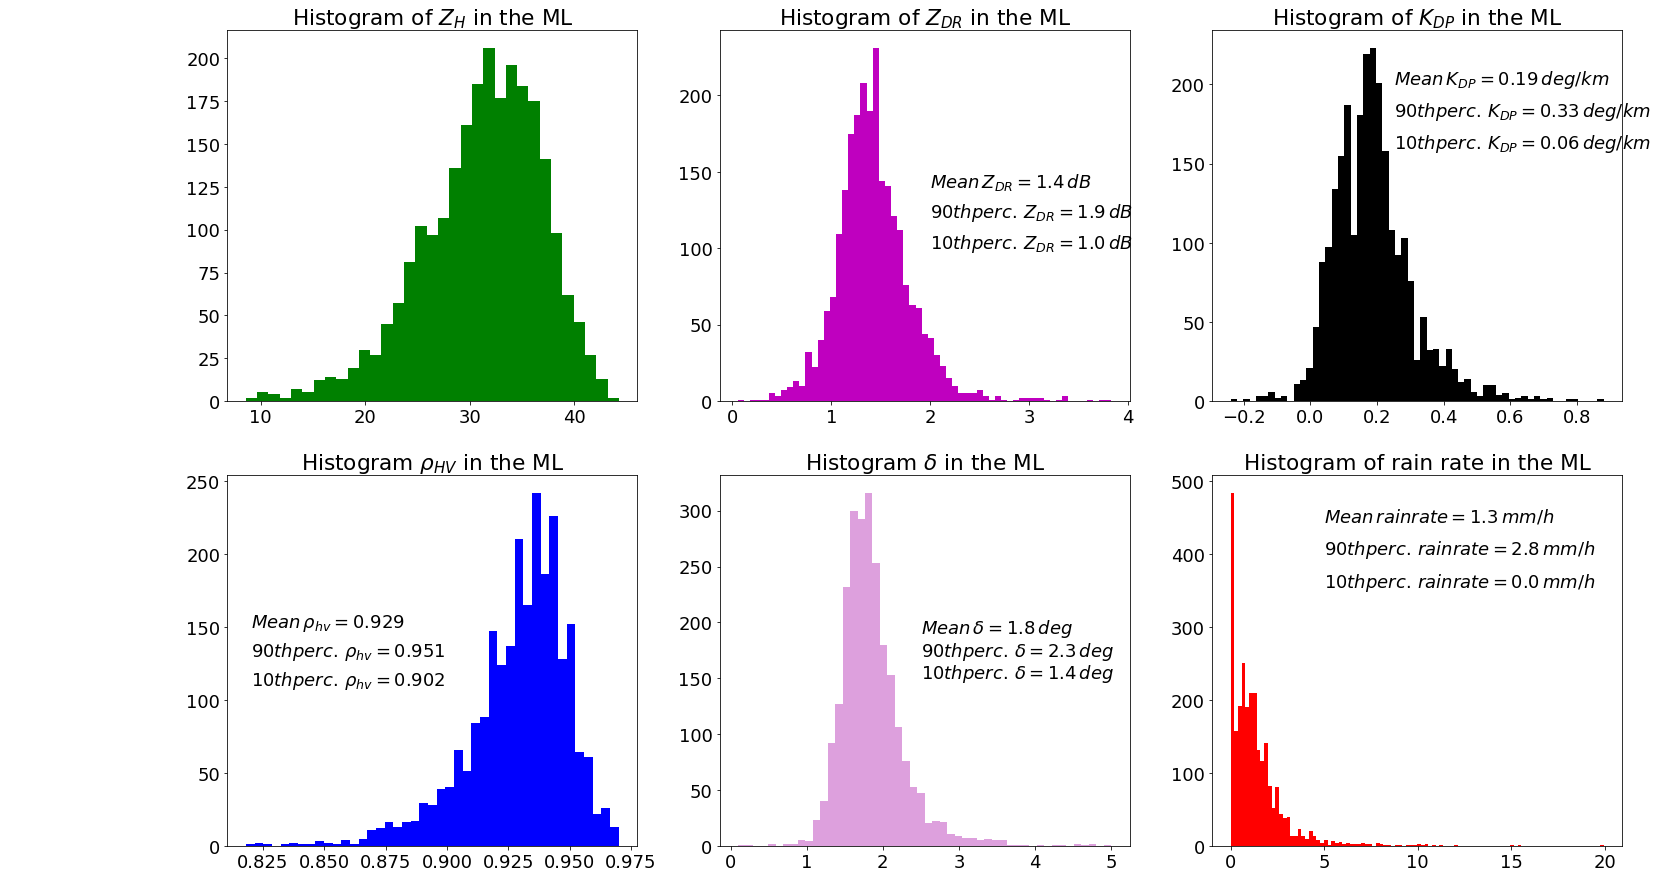

('beta_ave und _max und _min', -3.8553185, -1.738000011444089, -5.935999965667724)
('Kdp_slp_ave und _max und _min', 0.011993682, 0.13300000131130219, -0.11140000224113461)
('Kdp_2km_ave und _max und _min', 0.14340347, 0.37440000772476206, -0.057399999350309344)
('Kdp_D_ave und _max und _min', 0.16497494, 0.3866999983787539, 0.0)
('Kdp_snow_ave und _max und _min', 0.11832984, 0.21939999759197246, 0.02199999988079071)
('Kdp_ML_ave und _max und _min', 0.1867442, 0.33000001311302185, 0.05999999865889549)


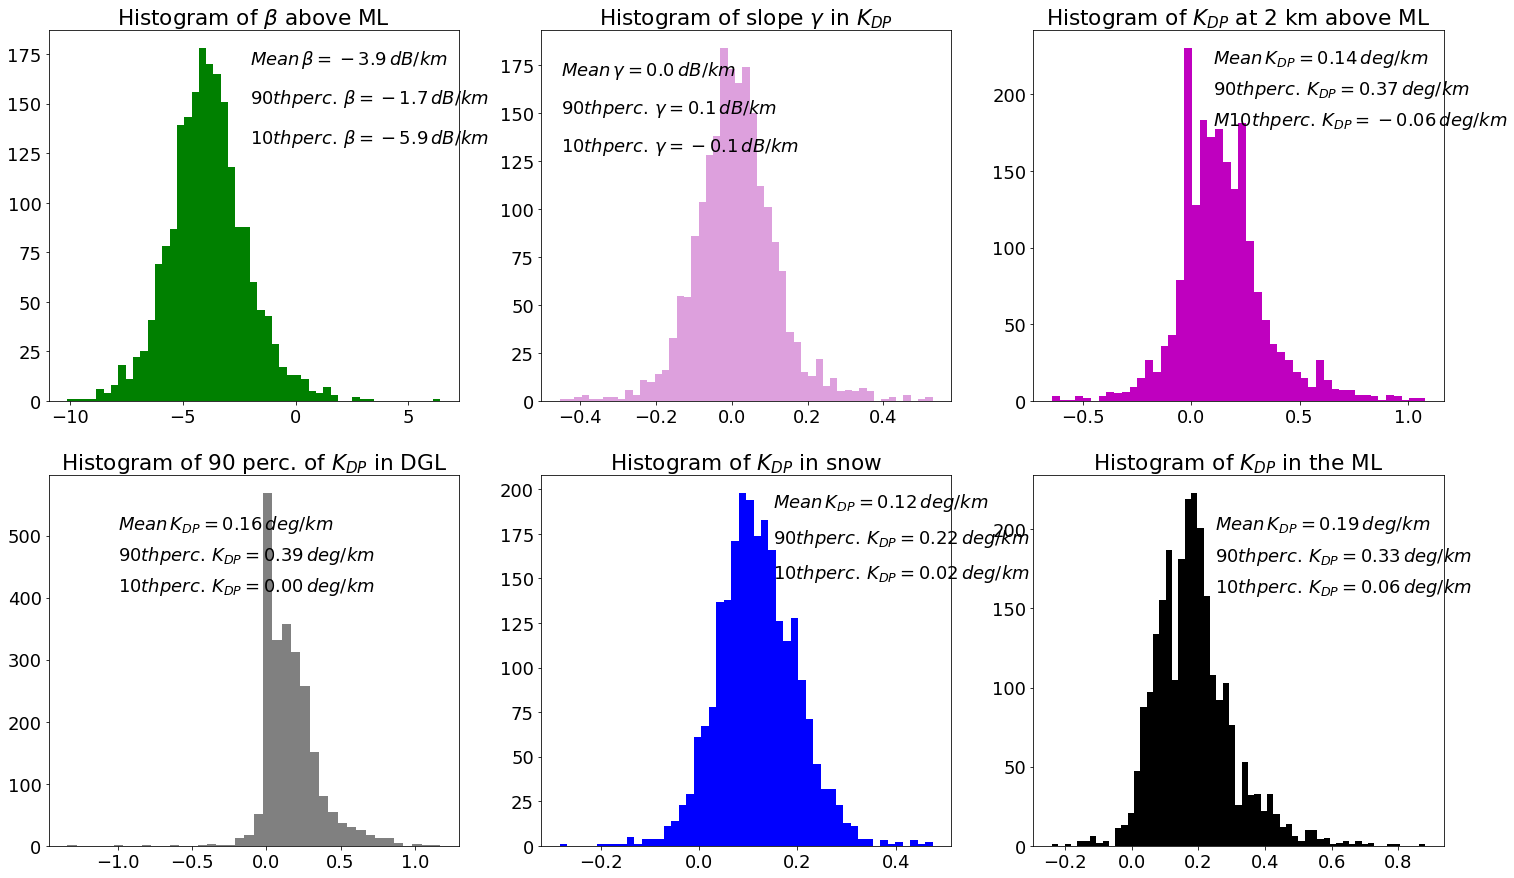

('Zdr_D_ave und _max und _min', 0.48005596, 0.75, 0.18000000715255737)


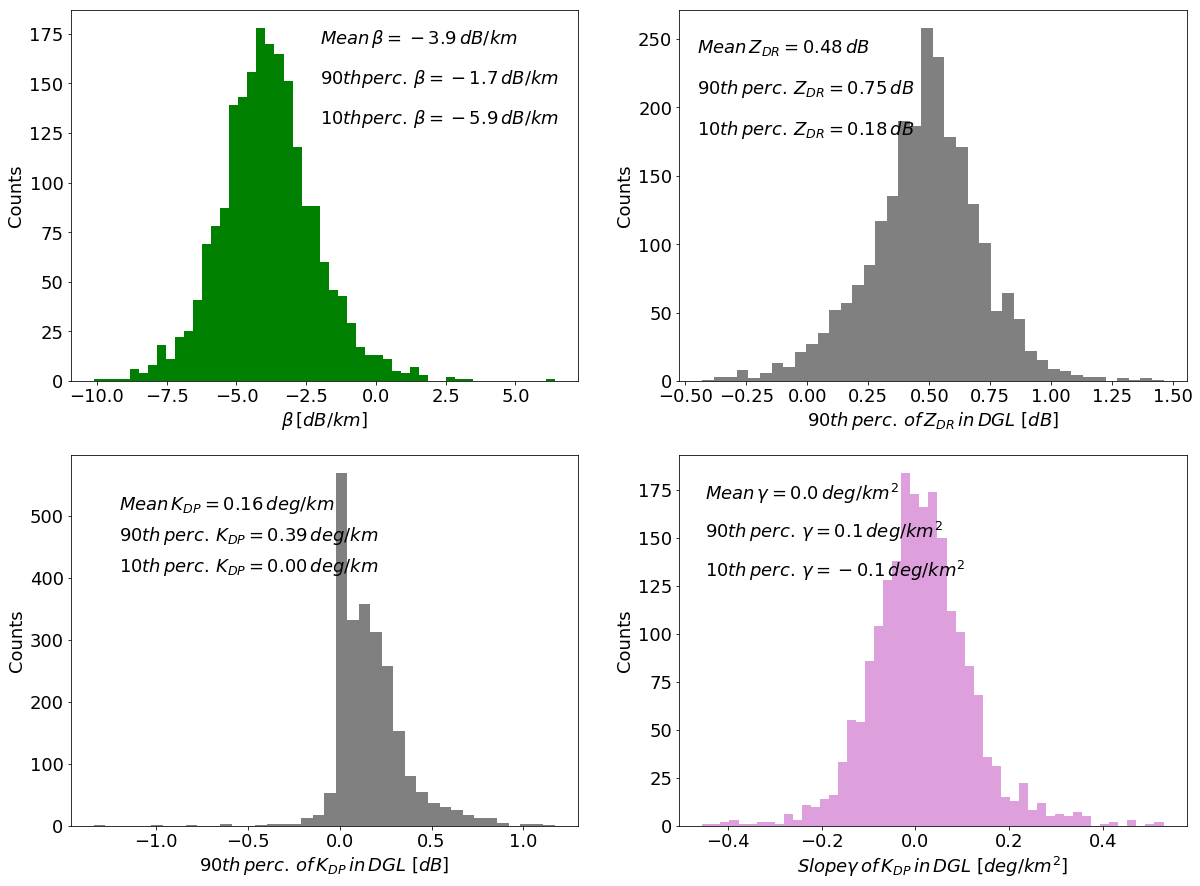

('Zdr_ML_ave und _max und _min', 1.4294257, 1.8799999952316284, 1.0299999713897705)
('Kdp_ML_ave und _max und _min', 0.1867442, 0.33000001311302185, 0.05999999865889549)
('R_ML_ave und _max und _min', 0.929048, 0.9509999752044678, 0.9020000100135803)
('D_ML_ave und _max und _min', 1.842248, 2.299999952316284, 1.399999976158142)
('St_ave und _max und _min', 1.3486403, 2.8200000286102296, 0.0)


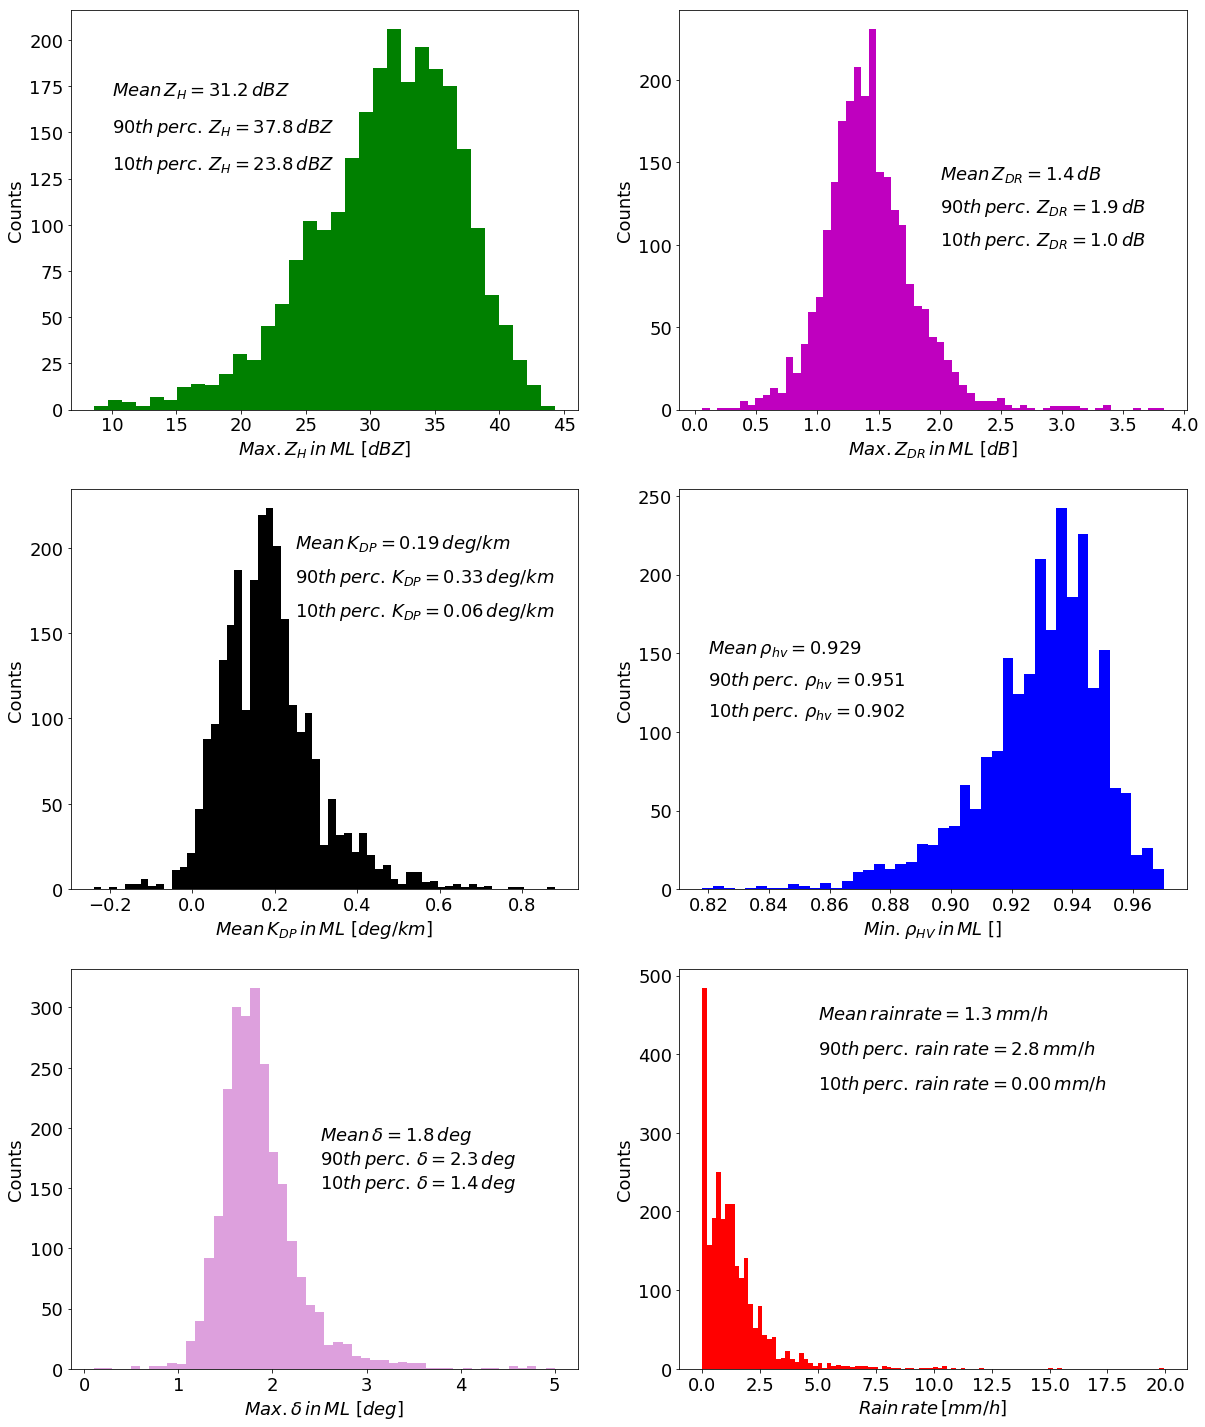

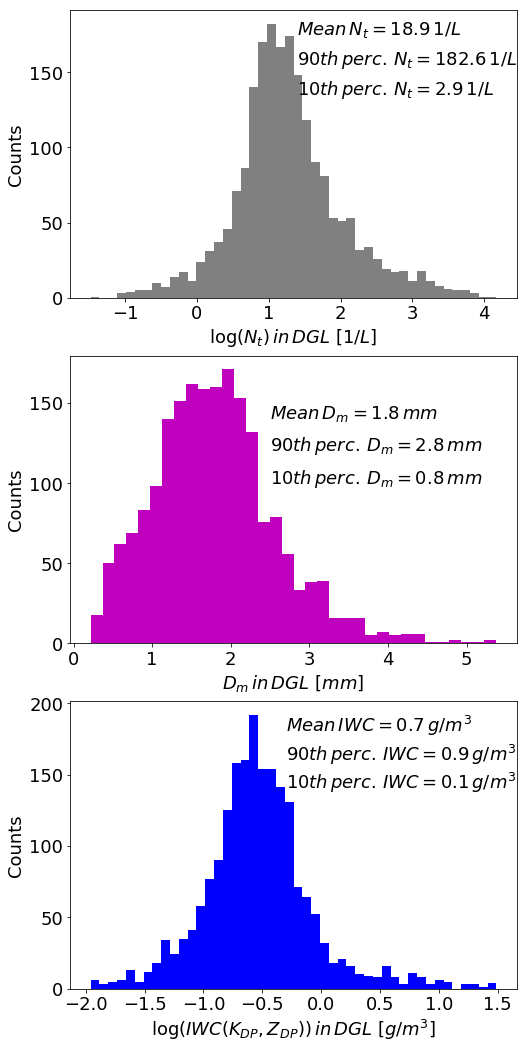

In [11]:
## read the QVP data
ML_b_clim=[]
ML_t_clim=[]
ML_th_clim=[]
Kdp_ML_clim=[]
Kdp_2km_clim=[]
Kdp_snow_clim=[]
Kdp_slp_clim=[]
beta_clim=[]
D_ML_clim=[]
Dh_clim=[]
Zh_ML_clim=[]
Zhh_clim=[]
Zdr_ML_clim=[]
Zdrh_clim=[]
R_ML_clim=[]
R_S_clim=[]
Rh_clim=[]
Kdp_D_clim=[]
Zdr_D_clim=[]
Zh_D_clim=[]
Zh_rain_clim=[]
Zh_S_clim=[]
Zdr_S_clim=[]
St_clim=[]
Day_clim=[]
Month_clim=[]
Year_clim=[]
MLthick_clim=[]

#for the overall retrieval
Kdp_D_new_clim=[]
Zh_D_new_clim=[]
St_h_new_clim=[]
D_ML_new_clim=[]
Zdr_D_new_clim=[]

#for ice retrievals
LogNt_D_clim=[]
Dm_D_clim=[]
ICW_D_clim=[]



#for k in range(len(outputf)):
for k in range(len(dates)):
#for k in range(0,14):    
    #file=outputf[k]
    file= datepath + "out_" + dates[k] + ".txt"
    file2 = datepath + "Kdpout_" + dates[k] + ".txt"
    #print('file',file)
    #beta, the slow in Zh-profile above the ML
    beta=[]
    #try Kdp_snow
    Kdp_snow=[]
    #try KDP_slope
    Kdp_slp=[]
    Kdp_2km=[]
    #Uhrzeit in 5min Schritten
    Time=[]
    #Hoehe Unterkante ML
    ML_b=[]
    #Hoehe Oberkante ML
    ML_t=[]
    #Dicke der ML
    ML_th=[]
    #Kdp in der ML
    Kdp_ML=[]
    #Maximales PHI in ML
    Phimax=[]
    #Delta in ML
    D_ML=[]
    # Betrachtetes Hoehenintervall für Kdp_ML Schaetzung
    Dh=[]
    #Zh in ML
    Zh_ML=[]
    #Hoehe des Zh Maximums in ML
    Zhh=[]
    #Zdr in ML
    Zdr_ML=[]
    #Hoehe des Zdr Maximums in ML
    Zdrh=[]
    #RHOhv Minimum in ML
    R_ML=[]
    #Rhohv at the surface
    R_S=[]
    #Hoehe des RHOhv Minimums
    Rh=[]
    #KDP in der DGL
    Kdp_D=[]
    #ZDR in der DGL
    Zdr_D=[]
    #Zh in der DGL
    Zh_D=[]
    #Zh in rain 150m below ML_bottom
    Zh_rain=[]
    #Zh am Boden
    Zh_S=[]
    #Zdr am Boden
    Zdr_S=[]
    #NN der ersten Raingaugestation
    St1=[]
    #NN der zweiten Raingaugestation
    St2=[]
    #NN der dritten Raingaugestation
    St3=[]
    St4=[]
    St5=[]
    #nun noch die Ice-Retrievals a la Ryzhkov et al. (2018)
    LogNt_D=[]
    Dm_D=[]
    ICW_D=[]
    
    

    
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    data =np.loadtxt(in_file, skiprows=1, usecols=range(1,26,1), dtype = 'f4')
    
    in_file2= open(datepath + "Kdpout_" + dates[k] + ".txt","r")
    #print(in_file2)
    data2 =np.loadtxt(in_file2, skiprows=1, usecols=range(5,12,1), dtype = 'f4')
    
    in_file3= open(datepath + "Retriev_" + dates[k] + ".txt","r")
    #print(in_file2)
    data3 =np.loadtxt(in_file3, skiprows=1, usecols=range(1,4,1), dtype = 'f4')
    
    in_file.close()
    in_file2.close()
    in_file3.close()
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    #Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = np.dtype(dtype))
    Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = 'S5')
    
    for l in range(len(Time)):
        Time[l]=Time[l][0:5]
        #St=max(St1,St2,St3)
        #print(Time[l],l)
    
    dates0 = dt.datetime.strptime(dates[k]+Time[0], '%Y-%m-%d%H:%M')
    dates1 = dt.datetime.strptime(dates[k]+Time[-1], '%Y-%m-%d%H:%M')
    deltat = dates1-dates0
    #print(dates0, dates1)
    
    Time=np.arange(dates0, dates1 + timedelta(minutes=5), timedelta(minutes=5))
    #print(Time)
    #will noch den Monat mitfuehren fuer Jahresgang in Statistik
    day = int(dates[k][8:10])
    month = int(dates[k][5:7])
    year = int(dates[k][0:4])
    day_array= np.ones(len(Time))*day
    Day_clim.extend(day_array)
    mon_array= np.ones(len(Time))*month
    Month_clim.extend(mon_array)
    year_array= np.ones(len(Time))*year
    Year_clim.extend(year_array)
    
    Kdp_snow=data2[:,0]
    Kdp_snow_clim.extend(Kdp_snow)
    Kdp_2km=data2[:,3]
    Kdp_2km_clim.extend(Kdp_2km)
    Kdp_slp=data2[:,4]
    Kdp_slp_clim.extend(Kdp_slp)
    beta=data2[:,6]
    beta_clim.extend(beta)
    
    
    ML_b=data[:,0]
    ML_b_clim.extend(ML_b)
    ML_t=data[:,1]
    ML_t_clim.extend(ML_t)
    ML_th=data[:,2]
    ML_th_clim.extend(ML_th)
    Kdp_ML=data[:,3]
    Kdp_ML_clim.extend(Kdp_ML)
    Phimax=data[:,4]
    
    D_ML=data[:,5]
    D_ML_clim.extend(D_ML)
    
    Dh=data[:,6]
    Dh_clim.extend(Dh)
    
    Zh_ML=data[:,7]
    Zh_ML_clim.extend(Zh_ML)
    
    Zhh=data[:,8]
    Zhh_clim.extend(Zhh)
    Zdr_ML=data[:,9]
    Zdr_ML_clim.extend(Zdr_ML)
    Zdrh=data[:,10]
    Zdrh_clim.extend(Zdrh)
    
    R_ML=data[:,11]
    R_ML_clim.extend(R_ML)
    
    Rh=data[:,12]
    Rh_clim.extend(Rh)
    Kdp_D=data[:,13]
    Kdp_D_clim.extend(Kdp_D)
    Zdr_D=data[:,14]
    Zdr_D_clim.extend(Zdr_D)
    Zh_D=data[:,15]
    Zh_D_clim.extend(Zh_D)
    Zh_rain=data[:,16]
    Zh_rain_clim.extend(Zh_rain)
    Zh_S=data[:,17]
    Zh_S_clim.extend(Zh_S)
    Zdr_S=data[:,18]
    Zdr_S_clim.extend(Zdr_S)
    R_S=data[:,19]
    R_S_clim.extend(R_S)
    St1=data[:,20]
    St2=data[:,21]
    St3=data[:,22]
    St4=data[:,23]
    St5=data[:,24]
    ## Single event statistics
     
    #St=(St1+St2+St3+St4+St5)/5.
    St= (St1+St2)/2.
    St_clim.extend(St)
    #St_clim.extend(St)
    St_all=(St1+St2+St3+St4+St5)/5.
    
    #Ice retrievals
    LogNt_D=data3[:,0]
    Dm_D=data3[:,1]
    ICW_D=data3[:,2]
    LogNt_D_clim.extend(LogNt_D)
    Dm_D_clim.extend(Dm_D)
    ICW_D_clim.extend(ICW_D)
    
########################################################################
LogNt_D_clim=np.stack(LogNt_D_clim)
Dm_D_clim=np.stack(Dm_D_clim)
ICW_D_clim=np.stack(ICW_D_clim)

Zh_ML_clim=np.stack(Zh_ML_clim)
Zh_S_clim=np.stack(Zh_S_clim)
Zh_Ss_clim=savitzky_golay(Zh_S_clim, window_size=13, order=2, deriv=0)
Zhh_clim=np.stack(Zhh_clim)
Zdrh_clim=np.stack(Zdrh_clim)
Rh_clim=np.stack(Rh_clim)
Zdr_ML_clim=np.stack(Zdr_ML_clim)
D_ML_clim=np.stack(D_ML_clim)
Kdp_ML_clim=np.stack(Kdp_ML_clim)
Kdp_snow_clim=np.stack(Kdp_snow_clim)
Kdp_D_clim=np.stack(Kdp_D_clim)
Zdr_D_clim=np.stack(Zdr_D_clim)
Kdp_slp_clim=np.stack(Kdp_slp_clim)
Kdp_2km_clim=np.stack(Kdp_2km_clim)
beta_clim=np.stack(beta_clim)
R_ML_clim=np.stack(R_ML_clim) 
Day_clim=np.stack(Day_clim)
Month_clim=np.stack(Month_clim)
Year_clim=np.stack(Year_clim)
#MLthick=Zhh_clim-Rh_clim

missing2= Zh_Ss_clim<5| np.isnan(R_ML_clim)| np.isnan(Zdr_ML_clim)
D_ML_clim=D_ML_clim[~missing2]
Kdp_ML_clim=Kdp_ML_clim[~missing2]
Day_clim=Day_clim[~missing2]
Month_clim=Month_clim[~missing2]
Year_clim=Year_clim[~missing2]
Kdp_D_clim=Kdp_D_clim[~missing2]
Kdp_snow_clim=Kdp_snow_clim[~missing2]
#Kdp_rain_clim=Kdp_rain_clim[~missing2]
#beta_clim=beta_clim[~missing2]
R_ML_clim=R_ML_clim[~missing2]
Kdp_slp_clim=Kdp_slp_clim[~missing2]
Kdp_2km_clim=Kdp_2km_clim[~missing2]
Zdr_D_clim=Zdr_D_clim[~missing2]
beta_clim=beta_clim[~missing2]
Zdr_ML_clim=Zdr_ML_clim[~missing2]
Zh_ML_clim=Zh_ML_clim[~missing2]
Zhh_clim=Zhh_clim[~missing2]
Zdrh_clim=Zdrh_clim[~missing2]
Rh_clim=Rh_clim[~missing2]
MLthick=Zhh_clim-Zdrh_clim

missing=(Zhh_clim<0.4)|(MLthick<0.0)   
D_ML_clim=D_ML_clim[~missing]
Day_clim=Day_clim[~missing]
Month_clim=Month_clim[~missing]
Year_clim=Year_clim[~missing]
Zdr_ML_clim=Zdr_ML_clim[~missing]
Zh_ML_clim=Zh_ML_clim[~missing]
R_ML_clim=R_ML_clim[~missing]
MLthick_clim=MLthick[~missing]

Kdp_snow_clim=Kdp_snow_clim[~missing]
Kdp_slp_clim=Kdp_slp_clim[~missing]
Kdp_2km_clim=Kdp_2km_clim[~missing]
Kdp_D_clim=Kdp_D_clim[~missing]
Zdr_D_clim=Zdr_D_clim[~missing]
beta_clim=beta_clim[~missing]
    
# Total mean over all events    
fig = pl.figure()  # create a figure object
pl.plot(Kdp_D_clim,Kdp_slp_clim, 'ro')
pl.xlabel(r'$K_{DP}$ in the DGL')
pl.ylabel(r'$K_{DP}$-slope')
fig.savefig('/home/silke/Python/projects/climatology/gamma_beta.png')
pl.show()


fig, ax = pl.subplots(2,3, figsize=(25, 15))
##search error###
mpl.rcParams.update({'font.size': 18})
nanlist=[]
for ii in range(len(R_ML_clim)):
    if np.isnan(R_ML_clim[ii]):
        nanlist.append(ii)
print("nanlist",nanlist)        
##end search error        

mask=np.isnan(Zh_ML_clim)
Zh_ML_clim=Zh_ML_clim[~mask]
Zh_ML_ave=np.nanmean(Zh_ML_clim, axis=0)
Zh_ML_max=np.nanpercentile(Zh_ML_clim, 90)
Zh_ML_min=np.nanpercentile(Zh_ML_clim, 10)
print('Zh_ML_ave und _max und _min', Zh_ML_ave, Zh_ML_max, Zh_ML_min)
ax[0,0].hist(Zh_ML_clim, bins='auto', color='green')
ax[0,0].annotate(r'$Mean\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_ave), xy=(5,140),xytext=(5,140))
ax[0,0].annotate(r'$90th perc.\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_max), xy=(5,120),xytext=(5,120))
ax[0,0].annotate(r'$10th perc.\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_min), xy=(5,100),xytext=(5,100))
ax[0,0].set_title(r'Histogram of $Z_{H}$ in the ML')

mask=np.isnan(Zdr_ML_clim)
Zdr_ML_clim=Zdr_ML_clim[~mask]
Zdr_ML_ave=np.nanmean(Zdr_ML_clim, axis=0)
Zdr_ML_max=np.nanpercentile(Zdr_ML_clim, 90)
Zdr_ML_min=np.nanpercentile(Zdr_ML_clim, 10)
print('Zdr_ML_ave und _max und _min', Zdr_ML_ave, Zdr_ML_max, Zdr_ML_min)
ax[0,1].hist(Zdr_ML_clim, bins='auto', color='m')
ax[0,1].annotate(r'$Mean\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_ave), xy=(2,140),xytext=(2,140))
ax[0,1].annotate(r'$90th perc.\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_max), xy=(2,120),xytext=(2,120))
ax[0,1].annotate(r'$10th perc.\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_min), xy=(2,100),xytext=(2,100))
ax[0,1].set_title(r'Histogram of $Z_{DR}$ in the ML')


mask=np.isnan(Kdp_ML_clim)
Kdp_ML_clim=Kdp_ML_clim[~mask]
Kdp_ML_ave=np.nanmean(Kdp_ML_clim, axis=0)
Kdp_ML_max=np.nanpercentile(Kdp_ML_clim, 90)
Kdp_ML_min=np.nanpercentile(Kdp_ML_clim, 10)
print('Kdp_ML_ave und _max und _min', Kdp_ML_ave, Kdp_ML_max, Kdp_ML_min)
ax[0,2].hist(Kdp_ML_clim, bins='auto', color='black')
ax[0,2].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_ave), xy=(0.25,200),xytext=(0.25,200))
ax[0,2].annotate(r'$90th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_max), xy=(0.25,180),xytext=(0.25,180))
ax[0,2].annotate(r'$10th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_min), xy=(0.25,160),xytext=(0.25,160))
ax[0,2].set_title(r'Histogram of $K_{DP}$ in the ML')

mask=np.isnan(R_ML_clim)
R_ML_clim=R_ML_clim[~mask]
R_ML_ave=np.nanmean(R_ML_clim, axis=0)
R_ML_max=np.nanpercentile(R_ML_clim, 90)
R_ML_min=np.nanpercentile(R_ML_clim, 10)
print('R_ML_ave und _max und _min', R_ML_ave, R_ML_max, R_ML_min)
ax[1,0].hist(R_ML_clim, bins='auto', color='b')
ax[1,0].annotate(r'$Mean\, \rho_{hv}=%5.3f$' % (R_ML_ave), xy=(0.82,150),xytext=(0.82,150))
ax[1,0].annotate(r'$90th perc.\, \rho_{hv}=%5.3f$' % (R_ML_max), xy=(0.82,130),xytext=(0.82,130))
ax[1,0].annotate(r'$10th perc.\, \rho_{hv}=%5.3f$' % (R_ML_min), xy=(0.82,110),xytext=(0.82,110))
ax[1,0].set_title(r'Histogram $\rho_{HV}$ in the ML')

mask=np.isnan(D_ML_clim)
D_ML_clim=D_ML_clim[~mask]
D_ML_ave=np.nanmean(D_ML_clim, axis=0)
D_ML_max=np.nanpercentile(D_ML_clim, 90)
D_ML_min=np.nanpercentile(D_ML_clim, 10)
print('D_ML_ave und _max und _min',D_ML_ave, D_ML_max, D_ML_min)
ax[1,1].hist(D_ML_clim, bins=50, color='plum')
ax[1,1].annotate(r'$Mean\, \delta=%5.1f \,deg$' % (D_ML_ave), xy=(2.5,190),xytext=(2.5,190))
ax[1,1].annotate(r'$90th perc.\,\delta=%5.1f \,deg$' % (D_ML_max), xy=(2.5,170),xytext=(2.5,170))
ax[1,1].annotate(r'$10th perc.\, \delta=%5.1f \,deg$' % (D_ML_min), xy=(2.5,150),xytext=(2.5,150))
ax[1,1].set_title(r'Histogram $\delta$ in the ML')



St_ave=np.nanmean(St_clim, axis=0)
St_max=np.nanpercentile(St_clim, 90)
St_min=np.nanpercentile(St_clim, 10)
print('St_ave und _max und _min', St_ave, St_max, St_min)
ax[1,2].hist(St_clim, bins='auto', color='r')
ax[1,2].annotate(r'$Mean\, rain rate=%5.1f \,mm/h$' % (St_ave), xy=(5,445),xytext=(5,445))
ax[1,2].annotate(r'$90th perc.\, rain rate=%5.1f \,mm/h$' % (St_max), xy=(5,400),xytext=(5,400))
ax[1,2].annotate(r'$10th perc.\, rain rate=%5.1f \,mm/h$' % (St_min), xy=(5,355),xytext=(5,355))
ax[1,2].set_title(r'Histogram of rain rate in the ML')
fig.savefig('/home/silke/Python/projects/climatology/histograms.png')
pl.show()

#### New Plot with beta and other Kdps
fig, ax = pl.subplots(2,3, figsize=(25, 15))
##search error###
mpl.rcParams.update({'font.size': 18})

mask=np.isnan(beta_clim)
beta_clim=beta_clim[~mask]
beta_ave=np.nanmean(beta_clim, axis=0)
beta_max=np.nanpercentile(beta_clim, 90)
beta_min=np.nanpercentile(beta_clim, 10)
print('beta_ave und _max und _min', beta_ave, beta_max, beta_min)
ax[0,0].hist(beta_clim, bins='auto', color='green')
ax[0,0].annotate(r'$Mean\, \beta=%5.1f \,dB/km$' % (beta_ave), xy=(-2,170),xytext=(-2,170))
ax[0,0].annotate(r'$90th perc.\, \beta=%5.1f \,dB/km$' % (beta_max), xy=(-2,150),xytext=(-2,150))
ax[0,0].annotate(r'$10th perc.\, \beta=%5.1f \,dB/km$' % (beta_min), xy=(-2,130),xytext=(-2,130))
ax[0,0].set_title(r'Histogram of $\beta$ above ML')

mask=np.isnan(Kdp_slp_clim)
Kdp_slp_clim=Kdp_slp_clim[~mask]
Kdp_slp_ave=np.nanmean(Kdp_slp_clim, axis=0)
Kdp_slp_max=np.nanpercentile(Kdp_slp_clim, 90)
Kdp_slp_min=np.nanpercentile(Kdp_slp_clim, 10)
print('Kdp_slp_ave und _max und _min', Kdp_slp_ave, Kdp_slp_max, Kdp_slp_min)
ax[0,1].hist(Kdp_slp_clim, bins='auto', color='plum')
ax[0,1].annotate(r'$Mean\, \gamma=%5.1f \,dB/km$' % (Kdp_slp_ave), xy=(-0.45,170),xytext=(-0.45,170))
ax[0,1].annotate(r'$90th perc.\, \gamma=%5.1f \,dB/km$' % (Kdp_slp_max), xy=(-0.45,150),xytext=(-0.45,150))
ax[0,1].annotate(r'$10th perc.\, \gamma=%5.1f \,dB/km$' % (Kdp_slp_min), xy=(-0.45,130),xytext=(-0.45,130))
ax[0,1].set_title(r'Histogram of slope $\gamma$ in $K_{DP}$')

mask=np.isnan(Kdp_2km_clim)
Kdp_2km_clim=Kdp_2km_clim[~mask]
Kdp_2km_ave=np.nanmean(Kdp_2km_clim, axis=0)
Kdp_2km_max=np.nanpercentile(Kdp_2km_clim, 90)
Kdp_2km_min=np.nanpercentile(Kdp_2km_clim, 10)

print('Kdp_2km_ave und _max und _min', Kdp_2km_ave, Kdp_2km_max, Kdp_2km_min)
ax[0,2].hist(Kdp_2km_clim, bins='auto', color='m')
ax[0,2].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_2km_ave), xy=(0.1,220),xytext=(0.1,220))
ax[0,2].annotate(r'$90th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_2km_max), xy=(0.1,200),xytext=(0.1,200))
ax[0,2].annotate(r'$M10th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_2km_min), xy=(0.1,180),xytext=(0.1,180))
ax[0,2].set_title(r'Histogram of $K_{DP}$ at 2 km above ML')


mask=np.isnan(Kdp_D_clim)
Kdp_D_clim=Kdp_D_clim[~mask]
Kdp_D_ave=np.nanmean(Kdp_D_clim, axis=0)
Kdp_D_max=np.nanpercentile(Kdp_D_clim, 90)
Kdp_D_min=np.nanpercentile(Kdp_D_clim, 10)

print('Kdp_D_ave und _max und _min', Kdp_D_ave, Kdp_D_max, Kdp_D_min)
ax[1,0].hist(Kdp_D_clim, bins=40, color='grey')
ax[1,0].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_ave), xy=(-1,510),xytext=(-1,510))
ax[1,0].annotate(r'$90th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_max), xy=(-1,460),xytext=(-1,460))
ax[1,0].annotate(r'$10th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_min), xy=(-1,410),xytext=(-1,410))
ax[1,0].set_title(r'Histogram of 90 perc. of $K_{DP}$ in DGL')
############## Ausgabe fuer Jacob Carlin ######################
fjacob=open(datepath + 'climat_ML.txt','wb')
fjacob.write("%6s %5s %5s %6s %5s %4s" %
              ('ZH_ML','ZDR_ML','KDP_ML','RHV_ML','D_ML','RR\n'))  
for i in range(len(Zh_ML_clim)):   
    fjacob.write("%5.2f %5.2f %7.2f %6.3f %5.1f %5.2f\n" %
            (Zh_ML_clim[i], Zdr_ML_clim[i],Kdp_ML_clim[i],R_ML_clim[i], D_ML_clim[i], St_clim[i]))
fjacob.close()
########### erweiterte Ausgabeversion fuer Jahresgangstats #######
fjacob2=open(datepath + 'climat_ML_ext.txt','wb')
fjacob2.write("%6s %6s %5s %5s %6s %5s %6s %5s %6s %6s" %
              ('Month','ZH_ML','ZDR_ML','KDP_ML','RHV_ML','D_ML', 'MLthick', 'RR', 'Year', 'Day\n'))  
for i in range(len(Zh_ML_clim)):   
    fjacob2.write("%5.1f %5.2f %5.2f %7.2f %6.3f %5.1f %5.3f %5.2f %6.1f %5.1f\n" %
            (Month_clim[i], Zh_ML_clim[i], Zdr_ML_clim[i],Kdp_ML_clim[i], R_ML_clim[i], D_ML_clim[i], MLthick_clim[i], St_clim[i], Year_clim[i], Day_clim[i]))
fjacob2.close()

fjacob3=open(datepath + 'climat_DGL.txt','wb')
fjacob3.write("%6s %6s %5s %5s %6s %6s" %
              ('Month','KDP_D','KDP_slp','beta', 'Year', 'Day\n'))  
#for i in range(len(Kdp_D_clim)):   
for i in range(2025):   
    fjacob3.write("%5.1f %5.2f %5.2f %7.2f %6.1f %5.1f\n" %
            (Month_clim[i], Kdp_D_clim[i], Kdp_slp_clim[i], beta_clim[i], Year_clim[i], Day_clim[i]))
fjacob3.close()

#D_ML_clim
#Kdp_ML_clim
#Zdr_ML_clim
#St_clim
#R_ML_clim
#Zh_ML_clim
#################Ende Jacob ##############################################
mask=np.isnan(Kdp_snow_clim)
Kdp_snow_clim=Kdp_snow_clim[~mask]
Kdp_snow_ave=np.nanmean(Kdp_snow_clim, axis=0)
Kdp_snow_max=np.nanpercentile(Kdp_snow_clim, 90)
Kdp_snow_min=np.nanpercentile(Kdp_snow_clim, 10)

print('Kdp_snow_ave und _max und _min', Kdp_snow_ave, Kdp_snow_max, Kdp_snow_min)
ax[1,1].hist(Kdp_snow_clim, bins='auto', color='blue')
ax[1,1].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_snow_ave), xy=(0.15,190),xytext=(0.15,190))
ax[1,1].annotate(r'$90th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_snow_max), xy=(0.15,170),xytext=(0.15,170))
ax[1,1].annotate(r'$10th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_snow_min), xy=(0.15,150),xytext=(0.15,150))
ax[1,1].set_title(r'Histogram of $K_{DP}$ in snow')

print('Kdp_ML_ave und _max und _min', Kdp_ML_ave, Kdp_ML_max, Kdp_ML_min)
ax[1,2].hist(Kdp_ML_clim, bins='auto', color='black')
ax[1,2].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_ave), xy=(0.25,200),xytext=(0.25,200))
ax[1,2].annotate(r'$90th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_max), xy=(0.25,180),xytext=(0.25,180))
ax[1,2].annotate(r'$10th perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_min), xy=(0.25,160),xytext=(0.25,160))
ax[1,2].set_title(r'Histogram of $K_{DP}$ in the ML')

fig.savefig('/home/silke/Python/projects/climatology/histograms_beta.png')
pl.show()

#################
fig, ax = pl.subplots(2,2, figsize=(20, 15))

ax[0,0].hist(beta_clim, bins='auto', color='green')
ax[0,0].annotate(r'$Mean\, \beta=%5.1f \,dB/km$' % (beta_ave), xy=(-2,170),xytext=(-2,170))
ax[0,0].annotate(r'$90th perc.\, \beta=%5.1f \,dB/km$' % (beta_max), xy=(-2,150),xytext=(-2,150))
ax[0,0].annotate(r'$10th perc.\, \beta=%5.1f \,dB/km$' % (beta_min), xy=(-2,130),xytext=(-2,130))
#ax[0,0].set_title(r'Histogram of $\beta$ above ML')
ax[0,0].set_ylabel(r'Counts')
ax[0,0].set_xlabel(r'$\beta\, [dB/km]$')

mask=np.isnan(Zdr_D_clim)| (Zdr_D_clim <-0.5)
Zdr_D_clim=Zdr_D_clim[~mask]
Zdr_D_ave=np.nanmean(Zdr_D_clim, axis=0)
Zdr_D_max=np.nanpercentile(Zdr_D_clim, 90)
Zdr_D_min=np.nanpercentile(Zdr_D_clim, 10)

print('Zdr_D_ave und _max und _min', Zdr_D_ave, Zdr_D_max, Zdr_D_min)
ax[0,1].hist(Zdr_D_clim, bins=40, color='grey')
ax[0,1].annotate(r'$Mean\, Z_{DR}=%5.2f \,dB$' % (Zdr_D_ave), xy=(-0.45,240),xytext=(-0.45,240))
ax[0,1].annotate(r'$90th\, perc.\, Z_{DR}=%5.2f \,dB$' % (Zdr_D_max), xy=(-0.45,210),xytext=(-0.45,210))
ax[0,1].annotate(r'$10th\, perc.\, Z_{DR}=%5.2f \,dB$' % (Zdr_D_min), xy=(-0.45,180),xytext=(-0.45,180))
#ax[0,1].set_title(r'Histogram of 90 perc. of $Z_{DR}$ in DGL')
ax[0,1].set_ylabel(r'Counts')
ax[0,1].set_xlabel(r'$90th \, perc.\, of\, Z_{DR}\,in\,DGL\ [dB]$')

ax[1,0].hist(Kdp_D_clim, bins=40, color='grey')
ax[1,0].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_ave), xy=(-1.2,510),xytext=(-1.2,510))
ax[1,0].annotate(r'$90th\, perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_max), xy=(-1.2,460),xytext=(-1.2,460))
ax[1,0].annotate(r'$10th\, perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_D_min), xy=(-1.2,410),xytext=(-1.2,410))
#ax[1,0].set_title(r'Histogram of 90 perc. of $K_{DP}$ in DGL')
ax[1,0].set_ylabel(r'Counts')
ax[1,0].set_xlabel(r'$90th \,perc.\, of\, K_{DP}\,in\,DGL\ [dB]$')

ax[1,1].hist(Kdp_slp_clim, bins='auto', color='plum')
ax[1,1].annotate(r'$Mean\, \gamma=%5.1f \,deg/km^2$' % (Kdp_slp_ave), xy=(-0.45,170),xytext=(-0.45,170))
ax[1,1].annotate(r'$90th\, perc.\, \gamma=%5.1f \,deg/km^2$' % (Kdp_slp_max), xy=(-0.45,150),xytext=(-0.45,150))
ax[1,1].annotate(r'$10th\, perc.\, \gamma=%5.1f \,deg/km^2$' % (Kdp_slp_min), xy=(-0.45,130),xytext=(-0.45,130))
#ax[1,1].set_title(r'Histogram of slope $\gamma$ in $K_{DP}$')
ax[1,1].set_ylabel(r'Counts')
ax[1,1].set_xlabel(r'$Slope \gamma\, of\, K_{DP}\,in\,DGL\ [deg/km^2]$')
pl.show()
fig.savefig('/home/silke/Python/projects/climatology/Paper_4.png')

fig, ax = pl.subplots(3,2, figsize=(20, 25))
ax[0,0].hist(Zh_ML_clim, bins='auto', color='green')
ax[0,0].annotate(r'$Mean\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_ave), xy=(10,170),xytext=(10,170))
ax[0,0].annotate(r'$90th\, perc.\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_max), xy=(10,150),xytext=(10,150))
ax[0,0].annotate(r'$10th\, perc.\, Z_{H}=%5.1f \,dBZ$' % (Zh_ML_min), xy=(10,130),xytext=(10,130))
#ax[0,0].set_title(r'Histogram of $Z_{H}$ in the ML')
ax[0,0].set_ylabel(r'Counts')
ax[0,0].set_xlabel(r'$Max. Z_{H}\,in\,ML\ [dBZ]$')

mask=np.isnan(Zdr_ML_clim)
Zdr_ML_clim=Zdr_ML_clim[~mask]
Zdr_ML_ave=np.nanmean(Zdr_ML_clim, axis=0)
Zdr_ML_max=np.nanpercentile(Zdr_ML_clim, 90)
Zdr_ML_min=np.nanpercentile(Zdr_ML_clim, 10)
print('Zdr_ML_ave und _max und _min', Zdr_ML_ave, Zdr_ML_max, Zdr_ML_min)
ax[0,1].hist(Zdr_ML_clim, bins='auto', color='m')
ax[0,1].annotate(r'$Mean\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_ave), xy=(2,140),xytext=(2,140))
ax[0,1].annotate(r'$90th\, perc.\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_max), xy=(2,120),xytext=(2,120))
ax[0,1].annotate(r'$10th\, perc.\, Z_{DR}=%5.1f \,dB$' % (Zdr_ML_min), xy=(2,100),xytext=(2,100))
#ax[0,1].set_title(r'Histogram of $Z_{DR}$ in the ML')
ax[0,1].set_ylabel(r'Counts')
ax[0,1].set_xlabel(r'$Max. Z_{DR}\,in\,ML\ [dB]$')


mask=np.isnan(Kdp_ML_clim)
Kdp_ML_clim=Kdp_ML_clim[~mask]
Kdp_ML_ave=np.nanmean(Kdp_ML_clim, axis=0)
Kdp_ML_max=np.nanpercentile(Kdp_ML_clim, 90)
Kdp_ML_min=np.nanpercentile(Kdp_ML_clim, 10)
print('Kdp_ML_ave und _max und _min', Kdp_ML_ave, Kdp_ML_max, Kdp_ML_min)
ax[1,0].hist(Kdp_ML_clim, bins='auto', color='black')
ax[1,0].annotate(r'$Mean\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_ave), xy=(0.25,200),xytext=(0.25,200))
ax[1,0].annotate(r'$90th\, perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_max), xy=(0.25,180),xytext=(0.25,180))
ax[1,0].annotate(r'$10th\, perc.\, K_{DP}=%5.2f \,deg/km$' % (Kdp_ML_min), xy=(0.25,160),xytext=(0.25,160))
#ax[1,0].set_title(r'Histogram of $K_{DP}$ in the ML')
ax[1,0].set_ylabel(r'Counts')
ax[1,0].set_xlabel(r'$Mean\, K_{DP}\,in\,ML\ [deg/km]$')

mask=np.isnan(R_ML_clim)
R_ML_clim=R_ML_clim[~mask]
R_ML_ave=np.nanmean(R_ML_clim, axis=0)
R_ML_max=np.nanpercentile(R_ML_clim, 90)
R_ML_min=np.nanpercentile(R_ML_clim, 10)
print('R_ML_ave und _max und _min', R_ML_ave, R_ML_max, R_ML_min)
ax[1,1].hist(R_ML_clim, bins='auto', color='b')
ax[1,1].annotate(r'$Mean\, \rho_{hv}=%5.3f$' % (R_ML_ave), xy=(0.82,150),xytext=(0.82,150))
ax[1,1].annotate(r'$90th\, perc.\, \rho_{hv}=%5.3f$' % (R_ML_max), xy=(0.82,130),xytext=(0.82,130))
ax[1,1].annotate(r'$10th\, perc.\, \rho_{hv}=%5.3f$' % (R_ML_min), xy=(0.82,110),xytext=(0.82,110))
#ax[1,1].set_title(r'Histogram $\rho_{HV}$ in the ML')
ax[1,1].set_ylabel(r'Counts')
ax[1,1].set_xlabel(r'$Min. \rho_{HV}\,in\,ML\ []$')


print('D_ML_ave und _max und _min',D_ML_ave, D_ML_max, D_ML_min)
ax[2,0].hist(D_ML_clim, bins=50, color='plum')
ax[2,0].annotate(r'$Mean\, \delta=%5.1f \,deg$' % (D_ML_ave), xy=(2.5,190),xytext=(2.5,190))
ax[2,0].annotate(r'$90th\, perc.\,\delta=%5.1f \,deg$' % (D_ML_max), xy=(2.5,170),xytext=(2.5,170))
ax[2,0].annotate(r'$10th\, perc.\, \delta=%5.1f \,deg$' % (D_ML_min), xy=(2.5,150),xytext=(2.5,150))
#ax[2,0].set_title(r'Histogram $\delta$ in the ML')
ax[2,0].set_ylabel(r'Counts')
ax[2,0].set_xlabel(r'$Max. \delta\,in\,ML\ [deg]$')



St_ave=np.nanmean(St_clim, axis=0)
St_max=np.nanpercentile(St_clim, 90)
St_min=np.nanpercentile(St_clim, 10)
print('St_ave und _max und _min', St_ave, St_max, St_min)
ax[2,1].hist(St_clim, bins='auto', color='r')
ax[2,1].annotate(r'$Mean\, rain rate=%5.1f \,mm/h$' % (St_ave), xy=(5,445),xytext=(5,445))
ax[2,1].annotate(r'$90th\, perc.\, rain\, rate=%5.1f \,mm/h$' % (St_max), xy=(5,400),xytext=(5,400))
ax[2,1].annotate(r'$10th\, perc.\, rain\, rate=%5.2f \,mm/h$' % (St_min), xy=(5,355),xytext=(5,355))
#ax[2,1].set_title(r'Histogram of rain rate in the ML')
ax[2,1].set_ylabel(r'Counts')
ax[2,1].set_xlabel(r'$Rain\, rate\, [mm/h]$')
fig.savefig('/home/silke/Python/projects/climatology/Paper_5.png')
pl.show()

########################################
fig, ax = pl.subplots(3, figsize=(8, 18))

mask=np.isnan(LogNt_D_clim)
LogNt_D_clim=LogNt_D_clim[~mask]
LogNt_D_ave=np.nanmean(LogNt_D_clim, axis=0)
LogNt_D_max=np.nanpercentile(LogNt_D_clim, 90)
LogNt_D_min=np.nanpercentile(LogNt_D_clim, 10)
ax[0].hist(LogNt_D_clim, bins='auto', color='grey')
ax[0].annotate(r'$Mean\, N_{t}=%5.1f \,1/L$' % (10**LogNt_D_ave), xy=(1.4,175),xytext=(1.4,175))
ax[0].annotate(r'$90th\, perc.\,N_{t}=%5.1f \,1/L$' % (10**LogNt_D_max), xy=(1.4,155),xytext=(1.4,155))
ax[0].annotate(r'$10th\, perc.\,N_{t}=%5.1f \,1/L$' % (10**LogNt_D_min), xy=(1.4,135),xytext=(1.4,135))
ax[0].set_ylabel(r'Counts')
ax[0].set_xlabel(r'$\log(N_{t})\,in\,DGL\ [1/L]$')

mask=np.isnan(Dm_D_clim)
Dm_D_clim=Dm_D_clim[~mask]
Dm_D_ave=np.nanmean(Dm_D_clim, axis=0)
Dm_D_max=np.nanpercentile(Dm_D_clim, 90)
Dm_D_min=np.nanpercentile(Dm_D_clim, 10)
ax[1].hist(Dm_D_clim, bins='auto', color='m')
ax[1].annotate(r'$Mean\, D_{m}=%5.1f \,mm$' % (Dm_D_ave), xy=(2.5,140),xytext=(2.5,140))
ax[1].annotate(r'$90th\, perc.\, D_{m}=%5.1f \,mm$' % (Dm_D_max), xy=(2.5,120),xytext=(2.5,120))
ax[1].annotate(r'$10th\, perc.\, D_{m}=%5.1f \,mm$' % (Dm_D_min), xy=(2.5,100),xytext=(2.5,100))
ax[1].set_ylabel(r'Counts')
ax[1].set_xlabel(r'$D_{m}\,in\,DGL\ [mm]$')

mask=np.isnan(ICW_D_clim)|(ICW_D_clim <= 0)
ICW_D_clim=ICW_D_clim[~mask]
ICW_D_ave=np.nanmean(ICW_D_clim, axis=0)
ICW_D_max=np.nanpercentile(ICW_D_clim, 90)
ICW_D_min=np.nanpercentile(ICW_D_clim, 10)
ax[2].hist(np.log10(ICW_D_clim), bins='auto', color='blue')
ax[2].annotate(r'$Mean\, IWC=%5.1f \,g/m^3$' % (ICW_D_ave), xy=(-0.3,180),xytext=(-0.3,180))
ax[2].annotate(r'$90th\, perc.\, IWC=%5.1f \,g/m^3$' % (ICW_D_max), xy=(-0.3,160),xytext=(-0.3,160))
ax[2].annotate(r'$10th\, perc.\, IWC=%5.1f \,g/m^3$' % (ICW_D_min), xy=(-0.3,140),xytext=(-0.3,140))
ax[2].set_ylabel(r'Counts')
ax[2].set_xlabel(r'$\log(IWC(K_{DP},Z_{DP}))\,in\,DGL\ [g/m^3]$')

fig.savefig('/home/silke/Python/projects/climatology/Paper_6.png')
pl.show()



In [11]:
# the overall Snow retrieval
#print(Kdp_D_new_clim.dtype)
Kdp_D_new_clim=np.stack(Kdp_D_new_clim)
Zh_D_new_clim=np.stack(Zh_D_new_clim)
Zdr_D_new_clim=np.stack(Zdr_D_new_clim)
St_h_new_clim=np.stack(St_h_new_clim)
D_ML_new_clim=np.stack(D_ML_new_clim)
Zhlin_D_new_clim=10**(Zh_D_new_clim/10.)
Zdrlin_D_new_clim=10**(Zdr_D_new_clim/10.)
Dlin_ML_new_clim=10**(D_ML_new_clim/10.)

A = np.vstack([np.log10(Kdp_D_new_clim),np.log10(Zhlin_D_new_clim), np.ones(len(Kdp_D_new_clim))]).T
a,b,c=(np.linalg.lstsq(A,np.log10(St_h_new_clim))[0])
cc=10**(c)
Retrieval1_all=cc*Kdp_D_new_clim**a*Zhlin_D_new_clim**b
print('Retrieval1 all: cc,a,b',cc,a,b)

B = np.vstack([np.log10(Dlin_ML_new_clim),np.log10(Zhlin_D_new_clim), np.ones(len(Kdp_D_new_clim))]).T
d,e,f=(np.linalg.lstsq(B,np.log10(St_h_new_clim))[0])
ff=10**(f)
Retrieval2_all=ff*Dlin_ML_new_clim**d*Zhlin_D_new_clim**e

C = np.vstack([np.log10(Zdrlin_D_new_clim),np.log10(Zhlin_D_new_clim), np.ones(len(D_ML_new_clim))]).T
g,h,i=(np.linalg.lstsq(C,np.log10(St_h_new_clim))[0])
ii=10**(i)
Retrieval3_all=ii*Zdrlin_D_new_clim**(g)*Zhlin_D_new_clim**h

fig = pl.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(St_h_new_clim, Retrieval1_all,'ro',label=r'R1=%5.2f* Kdp(DGL)**%5.2f*Zh(DGL)**%5.2f' % (cc,a,b))
ax.plot(St_h_new_clim, Retrieval2_all,'ko',label=r'R2=%5.2f* D(ML)**%5.2f*Zh(DGL)**%5.2f' % (ff,d,e))
ax.plot(St_h_new_clim, Retrieval3_all,'bx',label=r'R3=%5.2f* Zdr(DGL)**%5.2f*Zh(DGL)**%5.2f' % (ii,g,h))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(0.97, 0.97), borderaxespad=0.)
ax.set_ylabel('R(KDP(DGL), ZH(DGL)); R(KDP(DGL), ZH(DGL))  [mm/h]')
ax.set_xlabel('Hourly measured rain rates [mm/h]')
fig.savefig('/home/silke/Python/projects/climatology/Retrieval_high.png')
pl.show()

ValueError: need at least one array to stack

In [ ]:
### In the ML
#delta in ML with Rho in ML
c_DML_RML, p =pearsonr(D_ML, R_ML)
#Zdr in ML with Rho in ML
c_ZdrML_RML, p =pearsonr(Zdr_ML, R_ML)
#Zdr in ML with delta in ML
c_ZdrML_DML, p =pearsonr(Zdr_ML, D_ML)
#delta in ML with Kdp in ML
c_KdpML_DML, p =pearsonr(Kdp_ML, D_ML)
#delta in ML with height level of delta
c_DML_Dh, p =pearsonr(D_ML, Dh)

print('Pearson in ML',c_DML_RML,c_ZdrML_RML,c_ZdrML_DML,c_KdpML_DML,c_DML_Dh )

###ML with Sfc
#Zdr at Sfc with Zdr in ML
c_ZdrSfc_ZdrML, p = pearsonr(Zdr_S, Zdr_ML)
#Zdr at Sfc with delta in ML
c_ZdrSfc_DML, p = pearsonr(Zdr_S, D_ML)
#delta in ML with Z at Sfc
c_ZhSfc_DML, p = pearsonr(Zh_S, D_ML)
print('Pearson ML vs Sfc',c_ZdrSfc_ZdrML, c_ZdrSfc_DML, c_ZhSfc_DML)

###DGL with Sfc
#Lagged Kdp at DGL with Z at Sfc
lag = np.argmax(correlate(Kdp_D, Zh_S))
c_sig = np.roll(Zh_S, shift=int(np.ceil(lag)))
print('lag',lag)
print(c_sig)

In [10]:
# Multilinear fitting from Ryzhkov S=1.48*kdpdlg**0.61 * Zhdgl**0.33

/home/silke/miniconda3/envs/wradlib_27/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 09:29:36.957157. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#direkt mit 5min-Werten

['2013-04-12T00:10:00.000000' '2013-04-12T00:15:00.000000'
 '2013-04-12T00:20:00.000000' '2013-04-12T00:25:00.000000'
 '2013-04-12T00:30:00.000000' '2013-04-12T00:35:00.000000'
 '2013-04-12T00:40:00.000000' '2013-04-12T00:45:00.000000'
 '2013-04-12T00:50:00.000000' '2013-04-12T00:55:00.000000'
 '2013-04-12T01:00:00.000000' '2013-04-12T01:05:00.000000'
 '2013-04-12T01:10:00.000000' '2013-04-12T01:15:00.000000'
 '2013-04-12T01:20:00.000000' '2013-04-12T01:25:00.000000'
 '2013-04-12T01:30:00.000000' '2013-04-12T01:35:00.000000'
 '2013-04-12T01:40:00.000000' '2013-04-12T01:45:00.000000'
 '2013-04-12T01:50:00.000000' '2013-04-12T01:55:00.000000'
 '2013-04-12T02:00:00.000000' '2013-04-12T02:05:00.000000'
 '2013-04-12T02:10:00.000000' '2013-04-12T02:15:00.000000'
 '2013-04-12T02:20:00.000000' '2013-04-12T02:25:00.000000'
 '2013-04-12T02:30:00.000000' '2013-04-12T02:35:00.000000'
 '2013-04-12T02:40:00.000000' '2013-04-12T02:45:00.000000'
 '2013-04-12T02:50:00.000000' '2013-04-12T02:55:00.00000

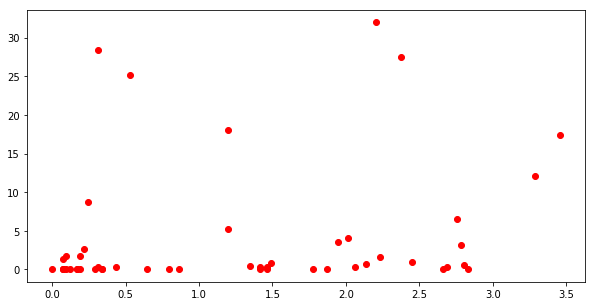

In [35]:
#linKdp_D=10**(Kdp_D/10.)
Zh_D_clim=np.stack(Zh_D_clim)
Kdp_D_clim=np.stack(Kdp_D_clim)
Kdp_ML_clim=np.stack(Kdp_ML_clim)
D_ML_clim=np.stack(D_ML_clim)
St_clim=np.stack(St_clim)
linZh_D_clim=10**(Zh_D_clim/10.)
#Zh_D
#St
print(Time)
start=dates0
end=dates1

missing = np.isnan(Kdp_D_clim)

Kdp_D_new=Kdp_D_clim[~missing]
Kdp_ML_new=Kdp_ML_clim[~missing]
Zh_D_new=Zh_D_clim[~missing]
print(Kdp_D_new)
St_new=St_clim[~missing]
print(St_new)
D_ML_new=D_ML_clim[~missing]

fig, ax = pl.subplots(figsize=(10, 5))

#Retriev=1.53*Kdp_D_new**(0.68)*Zh_D_new**0.29
#Retriev=10**(-2.77364662)*Kdp_D_h_clim**(-0.64093149)*Zh_D_h_clim**(2.12240623)
Retriev=10**(-10.81956363)*Kdp_D_new**(0.65091226)*Zh_D_new**(9.26608004)


#Retriev=10**(0.5103135)*Kdp_D_h_clim**(0.36195831)*Kdp_ML_h_clim**(1.70192433)
#Retriev=10**(0.12927204)*Kdp_D_h_clim**(2.75357236)*D_ML_h_clim**(8.31533512)


ax.plot(St_new, Retriev, 'ro')
pl.show()

#Stundenmittel

['2014-05-06T18:30:00.000000' '2014-05-06T18:35:00.000000'
 '2014-05-06T18:40:00.000000' '2014-05-06T18:45:00.000000'
 '2014-05-06T18:50:00.000000' '2014-05-06T18:55:00.000000'
 '2014-05-06T19:00:00.000000' '2014-05-06T19:05:00.000000'
 '2014-05-06T19:10:00.000000' '2014-05-06T19:15:00.000000'
 '2014-05-06T19:20:00.000000' '2014-05-06T19:25:00.000000'
 '2014-05-06T19:30:00.000000' '2014-05-06T19:35:00.000000'
 '2014-05-06T19:40:00.000000' '2014-05-06T19:45:00.000000'
 '2014-05-06T19:50:00.000000' '2014-05-06T19:55:00.000000'
 '2014-05-06T20:00:00.000000' '2014-05-06T20:05:00.000000'
 '2014-05-06T20:10:00.000000' '2014-05-06T20:15:00.000000'
 '2014-05-06T20:20:00.000000' '2014-05-06T20:25:00.000000'
 '2014-05-06T20:30:00.000000' '2014-05-06T20:35:00.000000'
 '2014-05-06T20:40:00.000000' '2014-05-06T20:45:00.000000'
 '2014-05-06T20:50:00.000000' '2014-05-06T20:55:00.000000'
 '2014-05-06T21:00:00.000000' '2014-05-06T21:05:00.000000'
 '2014-05-06T21:10:00.000000' '2014-05-06T21:15:00.00000

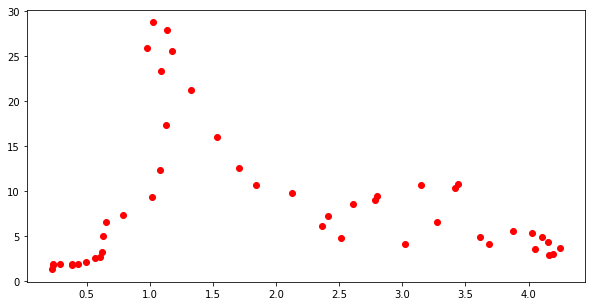

('Kdp_D_h_clim', array([ 0.34366667,  0.38091667,  0.40466666,  0.44116668,  0.45541668,
        0.46291669,  0.47074997,  0.47758329,  0.48883331,  0.4965833 ,
        0.51041667,  0.52025   ,  0.54875   ,  0.59549999,  0.63641663,
        0.66266668,  0.6840833 ,  0.69491673,  0.69708331,  0.69716668,
        0.68566664,  0.6495833 ,  0.59908334,  0.5604167 ,  0.50533334,
        0.44133333,  0.3925    ,  0.34791664,  0.31316666,  0.30025001,
        0.29683332,  0.30583334,  0.31833335,  0.33683332,  0.34958335,
        0.34341669,  0.35108336,  0.37291666,  0.38008332,  0.40291667,
        0.44324998,  0.47599999,  0.4995    ,  0.51991665,  0.52591666,
        0.5319167 ,  0.53899999,  0.53200003]))
('D_ML_h_clim', array([ 1.93333324,  1.83333317,  1.70833349,  1.62500016,  1.53333346,
        1.45000013,  1.42499987,  1.39166673,  1.375     ,  1.47500006,
        1.58333333,  1.6833334 ,  1.73333327,  2.04999987,  2.30000003,
        2.375     ,  2.35000006,  2.38333321,  2.399999

In [31]:
#linKdp_D=10**(Kdp_D/10.)
Zh_D_clim=np.stack(Zh_D_clim)
Kdp_D_clim=np.stack(Kdp_D_clim)
Kdp_ML_clim=np.stack(Kdp_ML_clim)
D_ML_clim=np.stack(D_ML_clim)
St_clim=np.stack(St_clim)
linZh_D_clim=10**(Zh_D_clim/10.)
#Zh_D
#St
print(Time)
start=dates0
end=dates1

missing = np.isnan(Kdp_D_clim)

Kdp_D_new=Kdp_D_clim[~missing]
Kdp_ML_new=Kdp_ML_clim[~missing]
print(Kdp_D_new)
linZh_D_new=linZh_D_clim[~missing]
St_new=St_clim[~missing]
print(St_new)
D_ML_new=D_ML_clim[~missing]

Kdp_D_h_clim = np.zeros((len(Kdp_D_new)-12))
Kdp_ML_h_clim = np.zeros((len(Kdp_ML_new)-12))
Zh_D_h_clim = np.zeros((len(linZh_D_new)-12))
St_h_clim = np.zeros((len(St_new)-12))
D_ML_h_clim = np.zeros((len(D_ML_new)-12))

Kdp_D_h_clim=runningMean(Kdp_D_new,12)
Kdp_ML_h_clim=runningMean(Kdp_ML_new,12)
D_ML_h_clim = runningMean(D_ML_new,12)
print(Kdp_D_h_clim)
#Kdp_D_h=10*np.log10(Kdp_D_h)

Zh_D_h_clim=runningMean(linZh_D_new,12)
Zh_D_h_clim=10*np.log10(Zh_D_h_clim)
St_h_clim=runningMean(St_new, 12)
## NUll Niederschlag raus
missing2=St_h_clim<0.2
St_h_clim = St_h_clim[~missing2]
Kdp_ML_h_clim = Kdp_ML_h_clim[~missing2]
Zh_D_h_clim = Zh_D_h_clim[~missing2]
Kdp_D_h_clim =Kdp_D_h_clim[~missing2]
D_ML_h_clim = D_ML_h_clim[~missing2]
#plot(St_h_clim,Kdp_D_h_clim)

thourly=Time[0:len(Kdp_D_h_clim)]
print(thourly.shape)
fig, ax = pl.subplots(figsize=(10, 5))

#Retriev=1.53*Kdp_D_h_clim**(0.68)*Zh_D_h_clim**0.29
#Retriev=10**(-2.77364662)*Kdp_D_h_clim**(-0.64093149)*Zh_D_h_clim**(2.12240623)
Retriev=10**(-10.81956363)*Kdp_D_h_clim**(0.65091226)*Zh_D_h_clim**(9.26608004)


#Retriev=10**(0.5103135)*Kdp_D_h_clim**(0.36195831)*Kdp_ML_h_clim**(1.70192433)
#Retriev=10**(0.12927204)*Kdp_D_h_clim**(2.75357236)*D_ML_h_clim**(8.31533512)


ax.plot(St_h_clim, Retriev, 'ro')
pl.show()
print('Kdp_D_h_clim',Kdp_D_h_clim)
print('D_ML_h_clim',D_ML_h_clim)
print('Zh_D_h_clim',Zh_D_h_clim)
print('Kdp_ML_h_clim',Kdp_ML_h_clim)
print('St_h_clim',St_h_clim)

In [28]:
#A = np.array([Kdp_D_h,Zh_D_h])

A = np.vstack([np.log10(Kdp_D_h_clim),np.log10(Zh_D_h_clim), np.ones(len(Kdp_D_h_clim))]).T
#A = np.vstack([np.log10(Kdp_D_h_clim), np.log10(D_ML_h_clim), np.ones(len(Kdp_D_h_clim))]).T
print(np.linalg.lstsq(A,np.log10(St_h_clim))[0])
10**(-6.8924571)


[  0.65091226   9.26608004 -10.81956363]


1.2809816248051985e-07